<a href="https://colab.research.google.com/github/closgarcia/Music-Recommendation-Engine/blob/main/MR_DJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
dataset_url = 'https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks'
od.download('https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: closgarcia
Your Kaggle Key: ··········


100%|██████████| 193M/193M [00:01<00:00, 119MB/s] 


In [ ]:
dataset = './spotify-dataset-19212020-600k-tracks'

In [ ]:
import pandas as pd
tracks_df = pd.read_csv(dataset + '/tracks.csv')
artists_df = pd.read_csv(dataset + '/artists.csv')

Datasets we are working with:

* **tracks.csv**   audio features of tracks, 600k rows
* **artists.csv**  artists IDS's


In [ ]:
# Merge dataframes based on 'id_artists'
merged_df = pd.merge(tracks_df, artists_df, left_on='id_artists', right_on='id', how='left')

# Drop unnecessary columns
merged_df = merged_df.drop(columns=['id_x', 'id_y', 'followers', 'genres', 'name_y'])

# Handle missing values if any
merged_df = merged_df.dropna()

In [ ]:
print(merged_df.columns)


Index(['name_x', 'popularity_x', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity_y'],
      dtype='object')


In [ ]:
print(tracks_df.columns)


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


**This dataset, sourced from Kaggle and based on Spotify's API, includes information on over 600,000 songs spanning from 1921 to 2020. The dataset, represented as a DataFrame (DF), consists of various columns providing details about each song:**

* 'name': The title of the song.
*'year': The year the song was released.
*'artists': Lists all the artists involved in creating the song.
*'id': A unique identifier for each song.
*'popularity': Indicates how popular a song is, with values ranging from 0 to 100.
*'valence': Reflects the musical positiveness of the song, ranging from 0 to 1.
*'acousticness': Measures the acoustic quality of the song on a scale from 0 to 1.
*'danceability': Represents how suitable a song is for dancing, with values between 0 and 1.
*'duration_ms': The duration of the song in milliseconds.
*'energy': Describes the intensity and activity of the song, ranging from 0 to 1.
*'explicit': A binary indicator (0 or 1) representing whether the song contains explicit content.
*'instrumentalness': Indicates the likelihood of the song being instrumental, with values between 0 and 1.
*'key': Represents the musical key of the song on an octave, encoded as values from 0 to 11.
*'liveness': Measures the presence of an audience in the recording, ranging from 0 to 1.
*'loudness': Represents the loudness of the song on a scale from -60 to 0.
*'mode': A binary indicator (0 or 1) representing whether the song is in a minor or major key.
*'speechiness': Measures the presence of spoken words in the song, with values between 0 and 1.
*'tempo': Represents the tempo of the song, ranging from 50 to 150 beats per minute.

In [ ]:
# Merge relevant columns based on common keys ('id_artists' column)
merged_df = pd.merge(tracks_df, artists_df, left_on='id_artists', right_on='id', how='left')

# Check the merged DataFrame to ensure everything looks good
print(merged_df.head())

# Verify the columns in the merged DataFrame
print(merged_df.columns)


                     id_x                               name_x  popularity_x  \
0  35iwgR4jXetI318WEWsa1Q                                Carve             6   
1  021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista             0   
2  07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado             0   
3  08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado             0   
4  08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening             0   

   duration_ms  explicit              artists                  id_artists  \
0       126903         0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   
1        98200         0  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   
2       181640         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
3       176907         0  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   
4       163080         0      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']   

  release_date  danceability  energy  ...  instrumentaln

In [ ]:
# Convert lists in 'id_artists' column to tuples
tracks_df['id_artists'] = tracks_df['id_artists'].apply(tuple)

# Now, you can get unique values
unique_id_artists = tracks_df['id_artists'].unique()

# Print the unique values
print(unique_id_artists)


[('[', "'", '4', '5', 't', 'I', 't', '0', '6', 'X', 'o', 'I', '0', 'I', 'i', 'o', '4', 'L', 'B', 'E', 'V', 'p', 'l', 's', "'", ']')
 ('[', "'", '1', '4', 'j', 't', 'P', 'C', 'O', 'o', 'N', 'Z', 'w', 'q', 'u', 'k', '5', 'w', 'd', '9', 'D', 'x', 'r', 'Y', "'", ']')
 ('[', "'", '5', 'L', 'i', 'O', 'o', 'J', 'b', 'x', 'V', 'S', 'A', 'M', 'k', 'B', 'S', '2', 'f', 'U', 'm', '3', 'X', '2', "'", ']')
 ...
 ('[', "'", '1', 'Q', 'L', 'B', 'X', 'K', 'M', '5', 'G', 'C', 'p', 'y', 'Q', 'Q', 'S', 'V', 'M', 'N', 'Z', 'q', 'r', 'Z', "'", ']')
 ('[', "'", '1', 'd', 'y', '5', 'W', 'N', 'g', 'I', 'K', 'Q', 'U', '6', 'e', 'z', 'k', 'p', 'Z', 's', '4', 'y', '8', 'z', "'", ']')
 ('[', "'", '4', 'j', 'G', 'P', 'd', 'u', '9', '5', 'i', 'c', 'C', 'K', 'V', 'F', '3', '1', 'C', 'c', 'F', 'K', 'b', 'S', "'", ',', ' ', "'", '5', 'e', 'b', 'P', 'S', 'E', '9', 'Y', 'I', '5', 'a', 'L', 'e', 'Z', '1', 'Z', '2', 'g', 'k', 'q', 'j', 'n', "'", ']')]


In [ ]:
# Convert lists in 'id_artists' column to tuples
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: tuple(x) if isinstance(x, list) else (x,))

# Keep only the first artist ID in tuples with multiple elements
tracks_df['id_artists'] = tracks_df['id_artists'].apply(lambda x: x[0])

# Now, you can get unique values
unique_id_artists = tracks_df['id_artists'].unique()

# Print the unique values
print(unique_id_artists)


[('[', "'", '4', '5', 't', 'I', 't', '0', '6', 'X', 'o', 'I', '0', 'I', 'i', 'o', '4', 'L', 'B', 'E', 'V', 'p', 'l', 's', "'", ']')
 ('[', "'", '1', '4', 'j', 't', 'P', 'C', 'O', 'o', 'N', 'Z', 'w', 'q', 'u', 'k', '5', 'w', 'd', '9', 'D', 'x', 'r', 'Y', "'", ']')
 ('[', "'", '5', 'L', 'i', 'O', 'o', 'J', 'b', 'x', 'V', 'S', 'A', 'M', 'k', 'B', 'S', '2', 'f', 'U', 'm', '3', 'X', '2', "'", ']')
 ...
 ('[', "'", '1', 'Q', 'L', 'B', 'X', 'K', 'M', '5', 'G', 'C', 'p', 'y', 'Q', 'Q', 'S', 'V', 'M', 'N', 'Z', 'q', 'r', 'Z', "'", ']')
 ('[', "'", '1', 'd', 'y', '5', 'W', 'N', 'g', 'I', 'K', 'Q', 'U', '6', 'e', 'z', 'k', 'p', 'Z', 's', '4', 'y', '8', 'z', "'", ']')
 ('[', "'", '4', 'j', 'G', 'P', 'd', 'u', '9', '5', 'i', 'c', 'C', 'K', 'V', 'F', '3', '1', 'C', 'c', 'F', 'K', 'b', 'S', "'", ',', ' ', "'", '5', 'e', 'b', 'P', 'S', 'E', '9', 'Y', 'I', '5', 'a', 'L', 'e', 'Z', '1', 'Z', '2', 'g', 'k', 'q', 'j', 'n', "'", ']')]


### Exploratory Data Analysis
Exploratory data analysis (EDA) is a method used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods (IBM, 2023). EDA is a philosophy that allows us to approach a database without assumptions. It is a way of looking for patterns and summarizing the dataset's main characteristics beyond what they learn from modeling and hypothesis testing. When a data analyst employs EDA, it's like they're asking the data to tell them what they don't know (IBM, 2023).

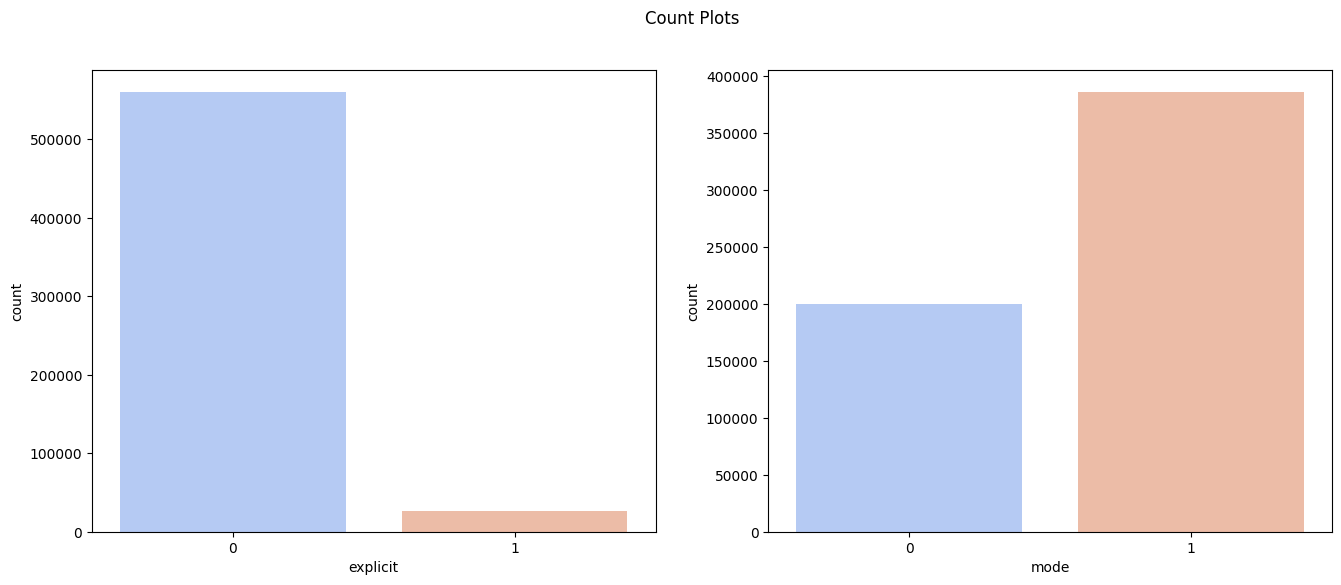

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Set the title for the entire plot
fig.suptitle('Count Plots')

# Plot count plots using merged_df DataFrame
sns.countplot(ax=axes[0], x='explicit', data=merged_df, palette='coolwarm')
sns.countplot(ax=axes[1], x='mode', data=merged_df, palette='coolwarm')

# Show the plots
plt.show()


* From the count plots, it's evident that there are relatively few explicit songs. Additionally, when classifying songs based on the 'mode' feature, the count for major key songs is approximately double that of minor key songs.
* This code first converts the 'release_date' column to a datetime data type, making it easier to extract useful information. Then, using a lambda function, the code extracts the year from the 'release_date' column and creates a new 'year' column in the DataFrame. This additional column can be valuable for further analysis and understanding trends over different years

In [ ]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'])
tracks_df['year'] = tracks_df['release_date'].apply(lambda time: time.year)

Trends of Various Track Features with Time

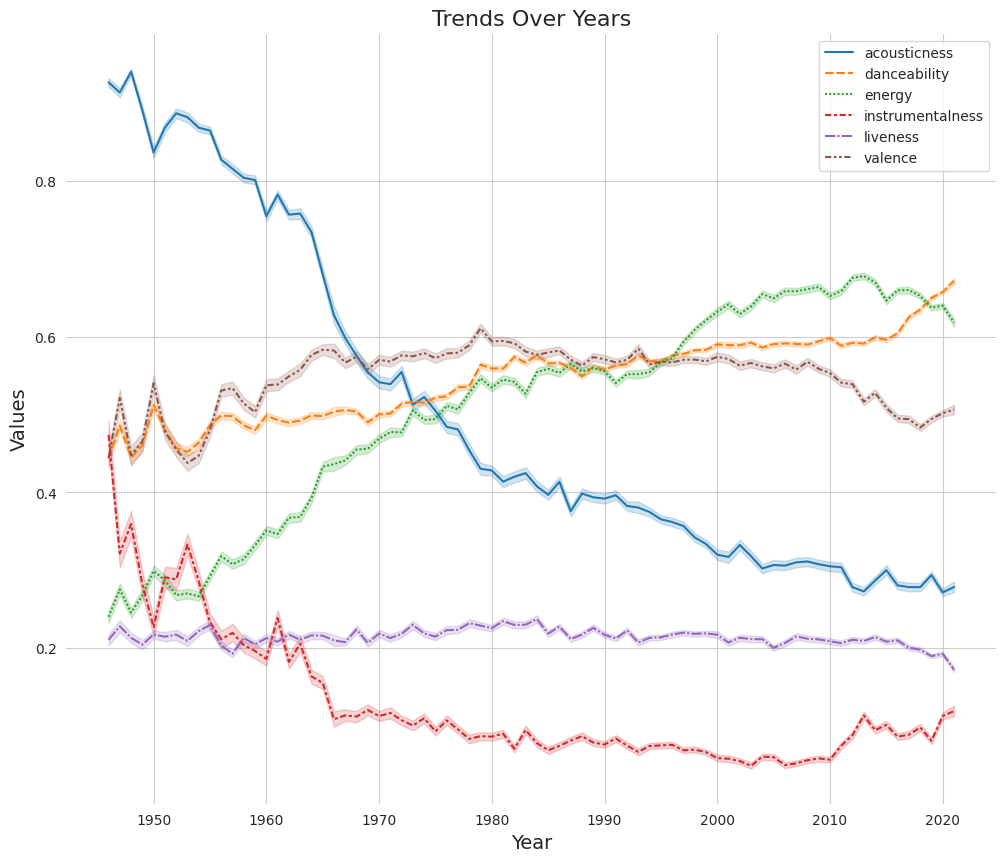

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
zerotoone = tracks_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'year']]
dfn = zerotoone[zerotoone['year'] > 1945].reset_index(drop=True)
dfn.set_index('year', inplace=True)

# Your DataFrame dfn should already be prepared
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))

# Plot the data with specific columns and style
sns.lineplot(data=dfn[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']], dashes=True)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Trends Over Years', fontsize=16)
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


* Over the years, the acoustic quality of songs showed a notable decline, particularly experiencing a sharp drop between 1965 and 1975.

* The danceability of songs exhibited an upward trend, indicating an increase in the songs' suitability for dancing as time progressed.

* In the 1960s, there was a significant surge in the energy levels of songs, reflecting a period marked by a rapid increase in musical intensity.

* Instrumentalness demonstrated a decrease over time, suggesting a decline in the likelihood of songs being instrumental as the years advanced.

* Liveness and valence have remained relatively stable throughout the analyzed time period, showing consistency in the presence of live elements and the overall musical positivity of songs.


### Comparison of Popularity Over Time:

* The first plot illustrates a histogram showcasing the distribution of song popularity across the dataset.

* The second plot is a scatterplot specifically highlighting songs with a popularity score exceeding 85. This scatterplot reveals how these highly popular songs are distributed across different years of release, providing insights into the temporal patterns of exceptionally well-received music.

<Axes: xlabel='popularity', ylabel='Count'>

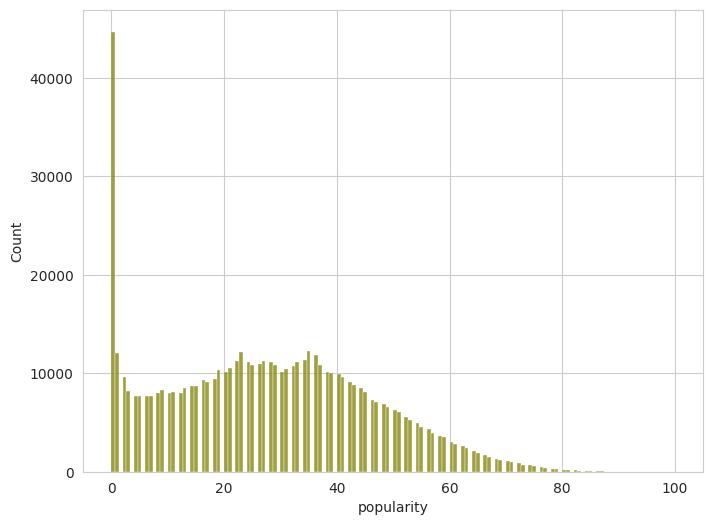

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='popularity',data=tracks_df,color="olive")

In [ ]:
df = tracks_df[tracks_df['popularity']>85][['name','artists','popularity','year','time_signature']]
fig = px.scatter(df,x='year', y='popularity',color='name',size='time_signature')
fig.show()


### Key Observations:

* A substantial number of songs in the dataset have a popularity score of zero, exceeding 40,000 instances.

* There's a scarcity of songs with a popularity rating surpassing 80, indicating that highly popular songs are relatively rare in the dataset.

* Notably, songs with high popularity tend to be more recent, suggesting a trend where contemporary music has garnered more attention and popularity.

* The overall popularity of songs in the dataset appears to align with the current musical trends prevailing at the time of dataset creation, indicating that popularity is influenced by the contemporaneous musical landscape.

# **Correlation of Features**

<ipython-input-17-a25904567edc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

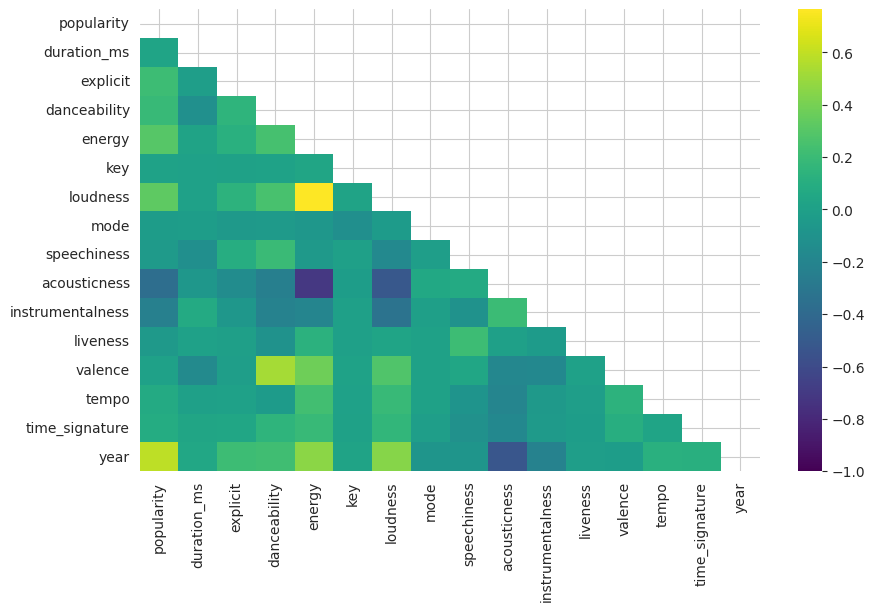

In [ ]:
plt.figure(figsize=(10,6))

corr = tracks_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [ ]:
corr[abs(corr['popularity']) > 0.25]['popularity']

popularity      1.000000
energy          0.302315
loudness        0.327028
acousticness   -0.370882
year            0.590921
Name: popularity, dtype: float64

### Key Findings:

* There is a strong positive correlation between a song's energy, loudness, and the year of release with its popularity. This suggests that songs with higher energy levels, louder volumes, and more recent release years tend to be more popular.

* On the other hand, there is an inverse correlation between a song's acousticness and its popularity. In simpler terms, songs with lower acoustic qualities are more likely to be popular.


# Exploring Artists' Popularity:

I've chosen five random artists for analysis:

*Post Malone
*Ed Sheeran
*Kanye West
*Drake
*Chris Brown

Now, I'll be plotting histograms to visually represent the distribution of popularity scores for each of these selected artists. This will give us a clearer picture of how popular their songs are within the dataset.

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year'],
      dtype='object')
0                ['Uli']
1    ['Fernando Pessoa']
2    ['Ignacio Corsini']
3    ['Ignacio Corsini']
4        ['Dick Haymes']
Name: artists, dtype: object
0    6
1    0
2    0
3    0
4    0
Name: popularity, dtype: int64


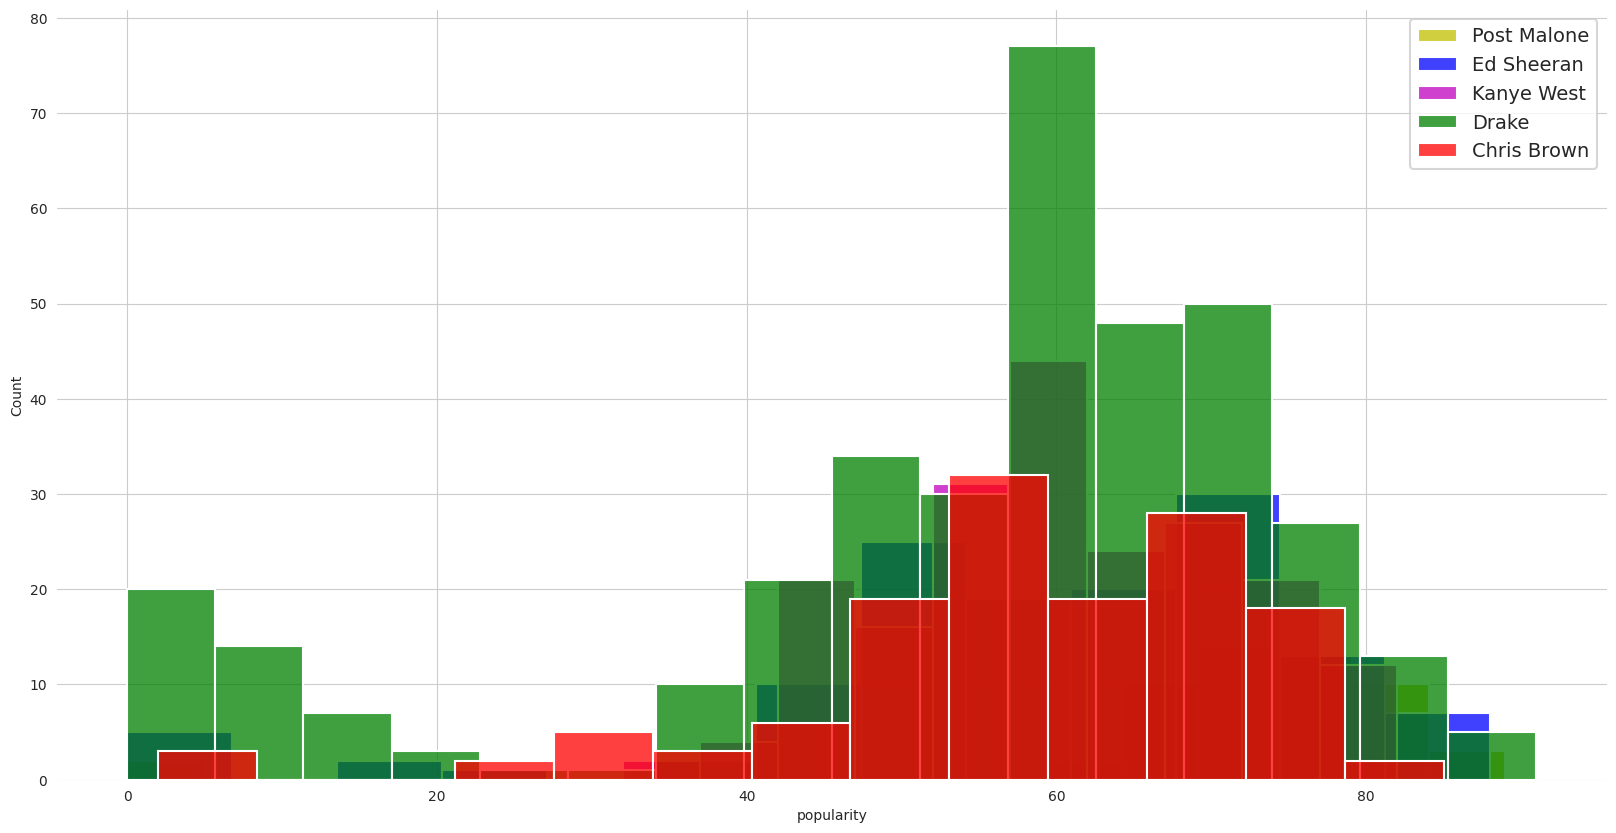

In [ ]:
# Check column names and data types
print(tracks_df.columns)
print(tracks_df['artists'].head())
print(tracks_df['popularity'].head())

# Convert 'artists' column to strings if it's not already
tracks_df['artists'] = tracks_df['artists'].astype(str)

# Select data for the specified artists
post = tracks_df[tracks_df['artists'].str.contains('Post Malone')]
ed = tracks_df[tracks_df['artists'].str.contains('Ed Sheeran')]
kw = tracks_df[tracks_df['artists'].str.contains('Kanye West')]
dra = tracks_df[tracks_df['artists'].str.contains('Drake')]
cb = tracks_df[tracks_df['artists'].str.contains('Chris Brown')]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Remove spines
sns.despine(fig, left=True, bottom=True)
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5})

# Plot histograms for each artist
sns.histplot(post['popularity'], color='y', label="Post Malone")
sns.histplot(ed['popularity'], color='b', label="Ed Sheeran")
sns.histplot(kw['popularity'], color='m', label="Kanye West")
sns.histplot(dra['popularity'], color='g', label="Drake")
sns.histplot(cb['popularity'], color='r', label="Chris Brown")

# Add legend
ax.legend(fontsize=14)

# Show the plot
plt.show()


### Key Findings:

* Out of these 5 artists, drake has the highest popularity






### Creating a Chart to Visualize Feature Trends with Popularity:

I'm developing a point chart that visually depicts the relationship between different features and the popularity of songs. This chart will help us understand how variations in specific musical characteristics correspond to changes in song popularity within the dataset.

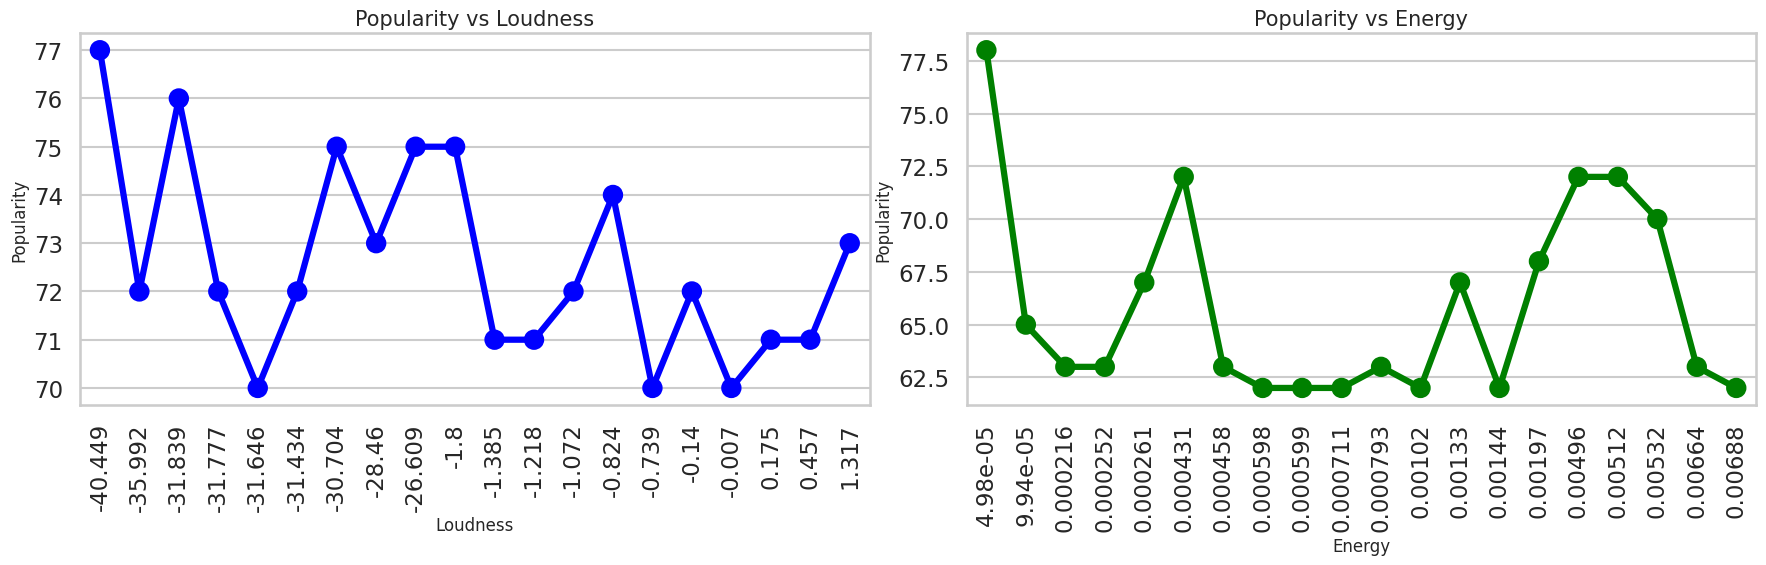

In [ ]:
# Group by 'loudness' and calculate mean popularity for the top 20 loudness values
ld = tracks_df.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Group by 'energy' and calculate mean popularity for the top 20 energy values
en = tracks_df.groupby("energy")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot popularity vs. loudness
sns.pointplot(data=ld, x="loudness", y="popularity", ax=axes[0], color='b')
axes[0].set_xlabel('Loudness', fontsize=12)
axes[0].set_ylabel('Popularity', fontsize=12)
axes[0].set_title('Popularity vs Loudness', fontsize=15)
axes[0].tick_params(axis='x', rotation=90)

# Plot popularity vs. energy
sns.pointplot(data=en, x="energy", y="popularity", ax=axes[1], color='g')
axes[1].set_xlabel('Energy', fontsize=12)
axes[1].set_ylabel('Popularity', fontsize=12)
axes[1].set_title('Popularity vs Energy', fontsize=15)
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


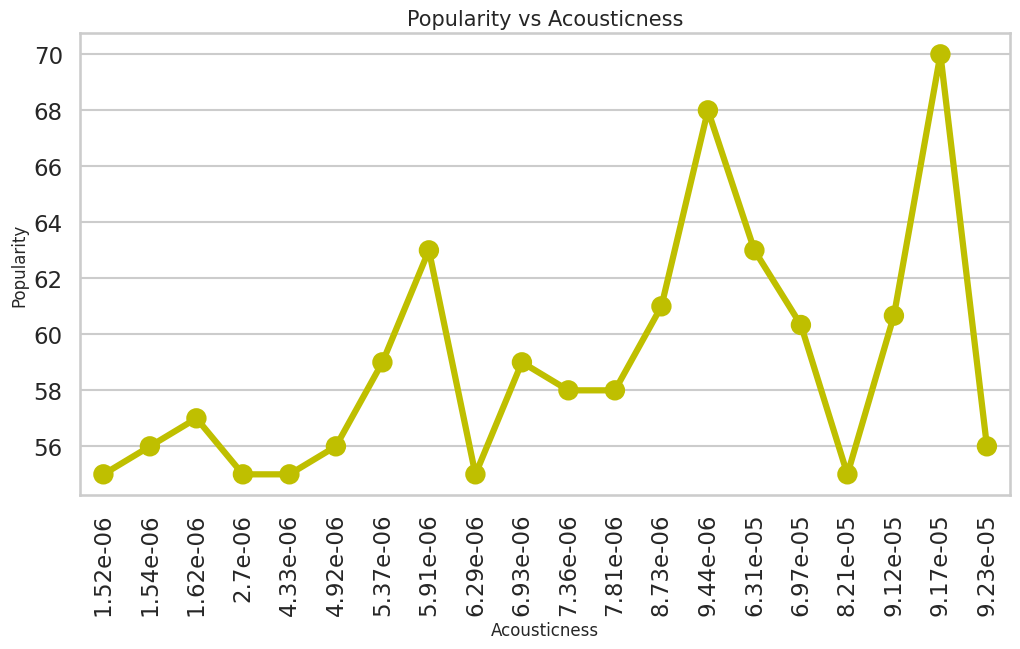

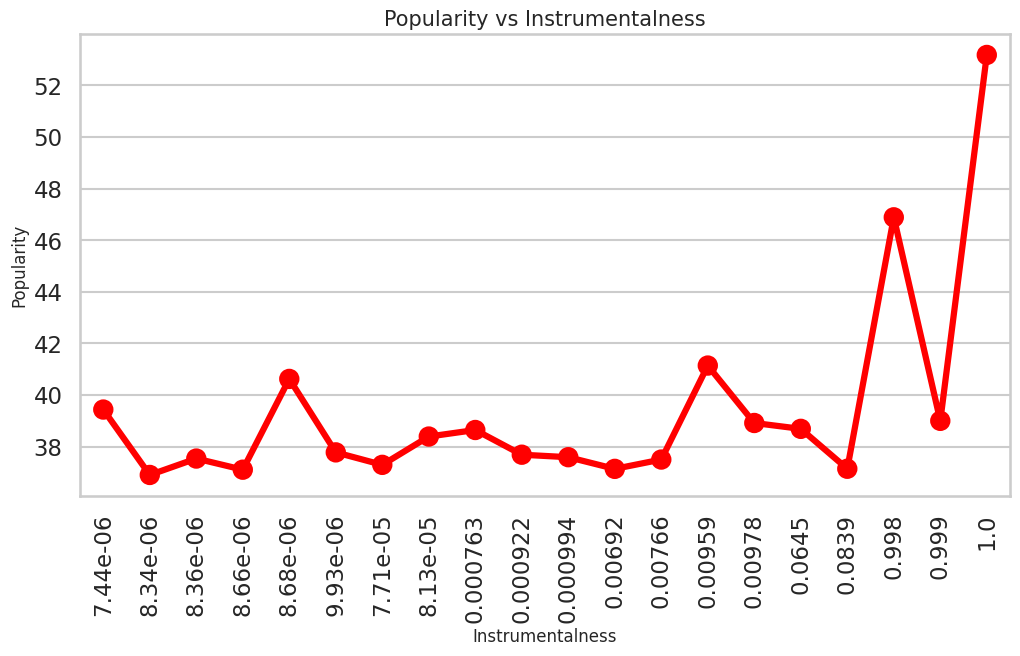

In [ ]:
# Group by 'acousticness' and calculate mean popularity for the top 20 acousticness values
ac = tracks_df.groupby("acousticness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Group by 'instrumentalness' and calculate mean popularity for the top 20 instrumentalness values
ins = tracks_df.groupby("instrumentalness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

# Plot popularity vs. acousticness
plt.figure(figsize=(12, 6))
sns.pointplot(data=ac, x="acousticness", y="popularity", color='y')
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Popularity vs Acousticness', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

# Plot popularity vs. instrumentalness
plt.figure(figsize=(12, 6))
sns.pointplot(data=ins, x="instrumentalness", y="popularity", color='r')
plt.xlabel('Instrumentalness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Popularity vs Instrumentalness', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()



## Exploration of Clustering in Analytics:

Clustering is a method used to organize similar observations into smaller groups within a larger dataset. In the context of business analytics, this approach addresses the challenge of structuring vast amounts of data into meaningful patterns.

In our case, we aim to implement different clustering algorithms to categorize our data into distinct clusters. These clusters will subsequently serve as input for our machine learning model in the recommender system.

I've experimented with five diverse clustering techniques:

Kmeans
BIRCH
MiniBatchKmeans
C means
Gaussian Mixture
Each of these techniques offers a unique way to group and structure our data, and we'll assess their effectiveness in enhancing our recommender system.

### Feature Scaling with Standard Scaler:

* To prepare our data for clustering, it's crucial to standardize the features, ensuring that no single feature dominates the clustering algorithm simply because it has a larger numerical range.

* To achieve this, we'll utilize the Standard Scaler from the sci-kit learn library. This process involves scaling down our data, bringing all features to a common range, and preventing any undue influence on the clustering results due to varying feature magnitudes.

* PCA (Principal Component Analysis) is a technique for reducing the dimensionality of data by utilizing the Singular Value Decomposition method. It involves transforming the data to a lower-dimensional space, making it more manageable while retaining essential information. Prior to applying the Singular Value Decomposition, the input data is centered, ensuring that each feature's mean is set to zero. However, the data is not scaled, maintaining the original scale of each feature.


* **K-Means Clustering** is an unsupervised learning algorithm designed for scenarios with unlabeled data. Its primary objective is to identify inherent groups within the dataset. This algorithm is versatile and finds application in various domains, such as grouping text documents, images, videos, and more. The K-Means algorithm operates through iterative steps, assigning each data point to a specific group based on the Euclidean distance, with the ultimate goal of forming distinct clusters within the data.

In [ ]:
# Assuming you have loaded your dataset into a DataFrame named 'dataset'
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

# Select numerical columns from the dataset
numeric_cols = tracks_df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(numeric_cols)
scaled_df = pd.DataFrame(scaled_X, columns=numeric_cols.columns)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

# Apply KMeans clustering with 8 clusters
kmeans = KMeans(n_clusters=8, verbose=2)
kmeans.fit(pca_df)

# Assign cluster labels to the original dataset
tracks_df['cluster_label'] = kmeans.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, tracks_df['cluster_label'])

# Print the Calinski-Harabasz score
print("Calinski-Harabasz Score:", calinski_harabasz_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 635209.1101319066.
Iteration 1, inertia 542669.2641797932.
Iteration 2, inertia 524296.5305855129.
Iteration 3, inertia 517005.90109779825.
Iteration 4, inertia 512964.41640813986.
Iteration 5, inertia 510147.78750122606.
Iteration 6, inertia 507829.85889472667.
Iteration 7, inertia 505837.3579851809.
Iteration 8, inertia 504030.71874647425.
Iteration 9, inertia 502371.35163868056.
Iteration 10, inertia 500864.15633497725.
Iteration 11, inertia 499435.9956064065.
Iteration 12, inertia 498035.42362054915.
Iteration 13, inertia 496711.67236310453.
Iteration 14, inertia 495429.182709908.
Iteration 15, inertia 494177.9774230835.
Iteration 16, inertia 493032.74245781975.
Iteration 17, inertia 491997.99339356914.
Iteration 18, inertia 491106.84191578464.
Iteration 19, inertia 490376.2145780041.
Iteration 20, inertia 489792.05027616204.
Iteration 21, inertia 489322.81878734427.
Iteration 22, inertia 488945.83425149217.
Iteration 23, inertia 488652.

* The Calinski-Harabasz score is a measure of clustering quality that evaluates both the separation between clusters and the compactness of clusters. A higher Calinski-Harabasz score indicates better-defined clusters.

* In this case, the Calinski-Harabasz score for the KMeans clustering with *k*
=
8.
k=8 clusters is approximately
441405.12. This suggests that the data points are well-clustered into distinct and compact groups.








**BIRCH Clustering** is an algorithm known for its memory efficiency and ability to learn online. It builds a tree-like data structure where cluster centroids are derived from the leaves. These centroids can serve as the final cluster representations or can be used as input for other clustering algorithms, like AgglomerativeClustering. Essentially, BIRCH efficiently organizes data in a hierarchical manner, making it conducive for subsequent clustering analyses.

In [ ]:
from sklearn.cluster import Birch
from sklearn import metrics
import pandas as pd

# Assuming pca_df is your PCA-transformed data
brc = Birch(n_clusters=20)
brc.fit(pca_df)

# Predict cluster labels
spotify_dataBirch = tracks_df.copy()
spotify_dataBirch['cluster_label'] = brc.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_dataBirch['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Birch clustering

# Initialize dict1 as an empty dictionary
dict1 = {}

# Add the score to dict1
dict1['BRICH'] = calinski_harabasz_score

# Optionally, if you want to see the number of samples in each cluster
cluster_counts = spotify_dataBirch['cluster_label'].value_counts()
print(cluster_counts)


141834.39052666796
6     171437
2     104587
19    104487
12     79327
13     51608
8      29856
5      18194
3      18153
7       5393
15      1860
1        905
17       462
11       160
14        51
9         48
0         47
16        42
10        38
4         16
18         1
Name: cluster_label, dtype: int64


* **Mini-Batch K-Means clustering** is a variation of the traditional K-Means algorithm designed for efficient memory usage. It operates by working with small, randomly selected batches of data of a fixed size that can fit into memory. In each iteration, a new random sample from the dataset is used to update the clusters, and this process continues until convergence is achieved. Essentially, Mini-Batch K-Means balances the need for memory efficiency by updating the clusters iteratively with manageable subsets of the data.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
minikmeans = MiniBatchKMeans(n_clusters=6, random_state=23, batch_size=32)
minikmeans.fit(pca_df)

# Predict cluster labels
spotify_minikmeans = tracks_df.copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_minikmeans['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for MiniBatchKMeans clustering

# Add the score to dict1
dict1['minibatch kmeans'] = calinski_harabasz_score

# Optionally, if you want to see the number of samples in each cluster
cluster_counts = spotify_minikmeans['cluster_label'].value_counts()
print(cluster_counts)


443135.03835650027
3    153652
0    134439
2    115900
1    105635
4     42771
5     34275
Name: cluster_label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



* **Fuzzy C-Means clustering** operates by assigning a membership value to each data point based on its distance from each cluster center. The closer a data point is to a cluster center, the higher its membership toward that specific cluster center. In other words, the algorithm introduces a degree of fuzziness in assigning data points to clusters, allowing for a more nuanced representation of the relationship between data points and cluster centers based on their distances.

In [ ]:
# Install the fuzzy-c-means package
!pip install fuzzy-c-means --quiet

# Import necessary libraries
from fcmeans import FCM
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
fcm = FCM(n_clusters=8)
fcm.fit(pca_df)

# Predict cluster labels using Fuzzy C-means
spotify_dataFuzzy = tracks_df.copy()
spotify_dataFuzzy['cluster_label'] = fcm.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_dataFuzzy['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Fuzzy C-means clustering

# Add the score to dict1
dict1['fuzzy c'] = calinski_harabasz_score


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
bigframes 0.15.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
430355.33348453586



**A Gaussian Mixture Model (GMM)**, also known as a Mixture of Gaussians, functions not just as a model but primarily as a probability distribution. Widely employed for generative unsupervised learning or clustering, it's sometimes referred to as Expectation-Maximization Clustering (EM Clustering). This model is built on an optimization strategy, aiming to capture complex patterns in the data by representing it as a combination of multiple Gaussian distributions.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

# Assuming pca_df is your PCA-transformed data
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(pca_df)

# Predict cluster labels using Gaussian Mixture
spotify_gm = tracks_df.copy()  # Assuming tracks_df is your original dataset
spotify_gm['cluster_label'] = gm.predict(pca_df)

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(pca_df, spotify_gm['cluster_label'])
print(calinski_harabasz_score)  # Output the Calinski-Harabasz score for Gaussian Mixture clustering

# Add the score to dict1
dict1['Gaussian Mixture'] = calinski_harabasz_score


432825.5653204308


## **We will assess the performance of these clustering algorithms using the Calinski Harabasz score obtained from sklearn.metrics.**

The Calinski-Harabasz (CH) Index, introduced by Calinski and Harabasz in 1974, serves as an evaluation metric when ground truth labels are unknown. It evaluates the clustering quality based on intrinsic dataset characteristics. The CH Index, also known as the Variance Ratio Criterion, measures how well an object aligns with its own cluster (cohesion) in comparison to other clusters (separation).

In simple terms, a higher CH score indicates a better clustering result, reflecting stronger cohesion within clusters and clearer separation between them.








In [ ]:
import pandas as pd
import plotly.express as px

# Assuming dict1 contains your cluster labels as keys and corresponding scores as values
dict1 = {
    'KMeans': 441405.1171084726,
    'BRICH': 183096.66712907582,
    'MiniBatch KMeans': 525157.673555993,
    'Fuzzy C-means': 566236.4181428673,
    'Gaussian Mixture': 553023.4780984044
}

# Create a DataFrame from dict1 and set the index
m = pd.DataFrame(list(dict1.items()), columns=['cluster', 'score'])
m.set_index('cluster', inplace=True)

# Plot the data using Plotly Express
fig = px.bar(m, orientation='h')
fig.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

# Define features and metadata columns
features = ['valence', 'year', 'acousticness',
            'danceability', 'duration_ms', 'energy',
            'explicit','instrumentalness', 'key',
            'liveness', 'loudness', 'mode',
            'popularity','speechiness', 'tempo']

metadata_cols = ['year', 'name',  'artists']

# Create a pipeline with StandardScaler and KMeans
song_cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=8, verbose=2))  # Adjust the number of clusters as needed
], verbose=True)

# Extract features for clustering
X = tracks_df[features]

# Fit the pipeline to the data
song_cluster_pipeline.fit(X)


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 7573337.012758838.
Iteration 1, inertia 5757157.609556457.
Iteration 2, inertia 5648171.942237834.
Iteration 3, inertia 5573450.32843588.
Iteration 4, inertia 5411911.3818996325.
Iteration 5, inertia 5183405.6297087.
Iteration 6, inertia 5117480.410735488.
Iteration 7, inertia 5070906.808452353.
Iteration 8, inertia 5052549.507271799.
Iteration 9, inertia 5044184.502508439.
Iteration 10, inertia 5037703.765973823.
Iteration 11, inertia 5031817.067174891.
Iteration 12, inertia 5026409.232375532.
Iteration 13, inertia 5021885.095527684.
Iteration 14, inertia 5018519.31642429.
Iteration 15, inertia 5016390.315687841.
Iteration 16, inertia 5014947.376990871.
Iteration 17, inertia 5013824.640806906.
Iteration 18, inertia 5012785.261068495.
Iteration 19, inertia 5011830.658362318.
Iteration 20, inertia 5010981.314931383.
Iteration 21, inertia 5010226.901721281.
Iteration 22, inertia 5009629.165808752.
Iteration 23, inertia 5009155.829666508.
Itera

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(verbose=2))],
         verbose=True)

# **Music Recommendation Funtions**
* In a content-based recommendation approach, the focus is on connecting users with content or items based on their preferences or past interactions. This method emphasizes the significance of both user and product attributes. For instance, in movie recommendations, features like director, actors, movie length, genre, and more are utilized to determine similarities between movies. The idea is to recommend items similar to those the user has already liked or interacted with by considering the specific characteristics or attributes associated with both users and products.

In [ ]:
def input_preprocessor(song_list, dataset):

    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(dataset['name'] == song['name']) &
                                (dataset['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)

In [ ]:
def Music_Recommender(song_list, dataset, n_songs=10):

    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, dataset)


    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(dataset[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))


    ed_dist = euclidean_distances(scaled_song_center, scaled_data)


    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]


    return rec_output[metadata_cols]

In [ ]:
import numpy as np

def input_preprocessor(song_list, tracks_df, features):
    """
    Preprocesses the input song list and creates feature vectors.

    Args:
        song_list (list): List of dictionaries containing song information.
        dataset (pd.DataFrame): DataFrame containing the dataset.
        features (list): List of feature column names in the dataset.

    Returns:
        np.array: Mean feature vector of the input songs.
    """
    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(tracks_df['name'] == song['name']) &
                                (tracks_df['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print('Warning: {} does not exist in our database'.format(song['name']))
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def tracks_groupby(song_list):
    # Implementation of tracks_groupby function (Assumed)
    pass

def input_preprocessor(song_list, tracks_df, features):
    # Implementation of input_preprocessor function (Assumed)
    pass

def Music_Recommender(song_list, tracks_df, n_songs=10):
    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, tracks_df, features)

    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(tracks_df[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = tracks_df.iloc[index]

    return rec_output[metadata_cols]

In [ ]:
def Music_Recommender(song_list, tracks_df, n_songs=10):
    groupby_input_tracks = tracks_groupby(song_list)
    song_center = input_preprocessor(song_list, tracks_df, features)

    if song_center is None:
        print("No valid song data found. Recommendation cannot be generated.")
        return None

    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(tracks_df[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))

    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = tracks_df.iloc[index]

    return rec_output[metadata_cols]


In [ ]:
def input_preprocessor(song_list, tracks_df, features):
    song_vectors = []

    for song in song_list:
        try:
            song_data = tracks_df[(tracks_df['name'] == song['name']) & (tracks_df['year'] == song['year'])].iloc[0]

        except IndexError:
            song_data = None

        if song_data is None:
            print(f'Warning: {song["name"]} from {song["year"]} not found in the dataset.')
            continue

        song_vectors.append(song_data[features].values)

    return np.mean(np.array(list(song_vectors)), axis=0)


In [ ]:
results = Music_Recommender([
    {'name': 'Toosie Slide', 'year': 2020},
    {'name': 'Outta Time (feat. Drake)', 'year': 2020},
    {'name': 'Chicago Freestyle (feat. Giveon)', 'year': 2020}
], tracks_df)
print(results)


        year                                     name  \
585192  2021                                   Mimosa   
92013   2019             Like That (feat. Gucci Mane)   
468559  2018                                Bitchuary   
374353  2020                                   Makina   
89823   2016                              I'm The Man   
92238   2019  sex money feelings die - slowed version   
93620   2020           Rags2Riches 2 (feat. Lil Baby)   
246175  2018                                    Roses   
374767  2021                                   Makina   
488787  2020                                     2012   

                             artists  
585192                  ['Dree Low']  
92013     ['Doja Cat', 'Gucci Mane']  
468559           ['Shordie Shordie']  
374353                       ['UZI']  
89823   ['50 Cent', 'Sonny Digital']  
92238                   ['Lykke Li']  
93620       ['Rod Wave', 'Lil Baby']  
246175                 ['SAINt JHN']  
374767               

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
# Assuming 'results' is the DataFrame containing the recommendations
formatted_results = results.to_string(index=False, header=True)

print(formatted_results)

 year                                    name                      artists
 2021                                  Mimosa                 ['Dree Low']
 2019            Like That (feat. Gucci Mane)   ['Doja Cat', 'Gucci Mane']
 2018                               Bitchuary          ['Shordie Shordie']
 2020                                  Makina                      ['UZI']
 2016                             I'm The Man ['50 Cent', 'Sonny Digital']
 2019 sex money feelings die - slowed version                 ['Lykke Li']
 2020          Rags2Riches 2 (feat. Lil Baby)     ['Rod Wave', 'Lil Baby']
 2018                                   Roses                ['SAINt JHN']
 2021                                  Makina                      ['UZI']
 2020                                    2012            ['Bausa', 'Juju']


In [ ]:
def user_input():
    # Prompt the user to enter the song name
    song_name = input("Enter the song name: ")

    # Prompt the user to enter the song year
    song_year = int(input("Enter the song year: "))

    return {'name': song_name, 'year': song_year}


# Get user input
user_song = user_input()

# Generate recommendations based on user input
results = Music_Recommender([user_song], tracks_df)
print("Recommendations based on your input:")
print(results.to_string(index=False, header=True))


Enter the song name: Toosie Slide
Enter the song year: 2020
Recommendations based on your input:
 year                           name                         artists
 2020                   Toosie Slide                       ['Drake']
 2020                   Toosie Slide                       ['Drake']
 2019                  Phone Numbers ['Dominic Fike', 'Kenny Beats']
 2017                     Spice Girl                       ['Aminé']
 2020           Pilote (feat. Hamza)                ['PLK', 'Hamza']
 2021                            512         ['Mora', 'Jhay Cortez']
 2020                  Por Mi México   ['Lefty Sm', 'Santa Fe Klan']
 2018 Hurts Like Hell (feat. Offset)      ['Madison Beer', 'Offset']
 2020                       Go Crazy   ['Chris Brown', 'Young Thug']
 2014                           Herz                        ['Sido']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

